index             0
id                0
date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64


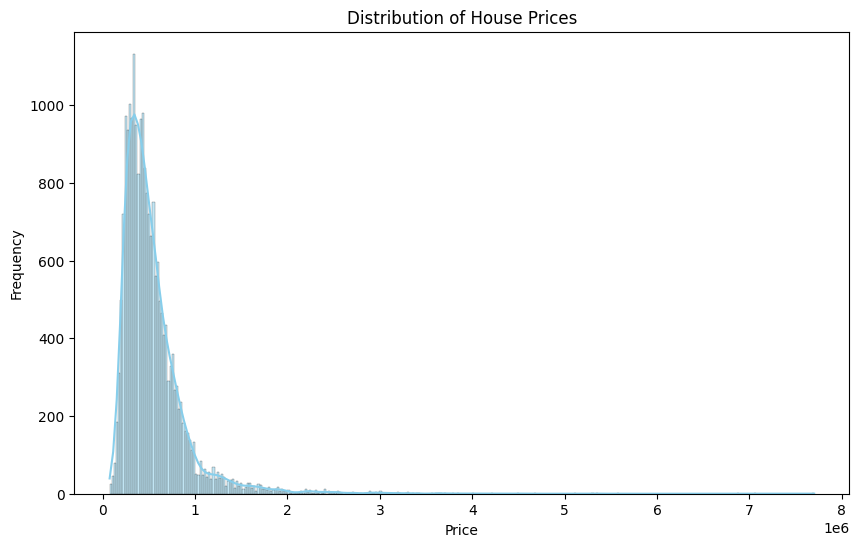

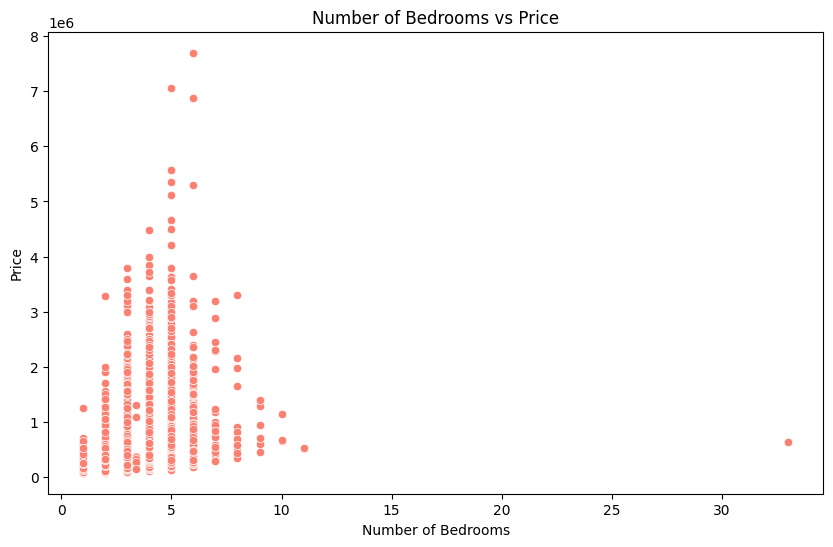

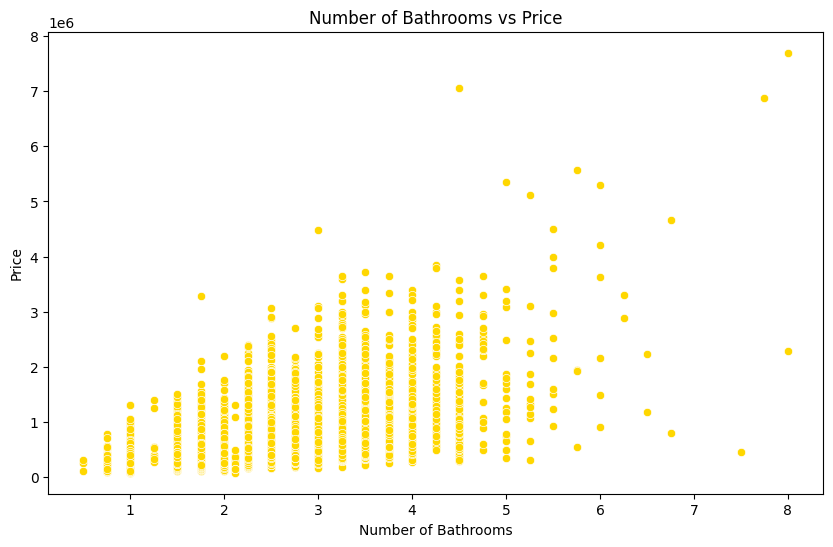

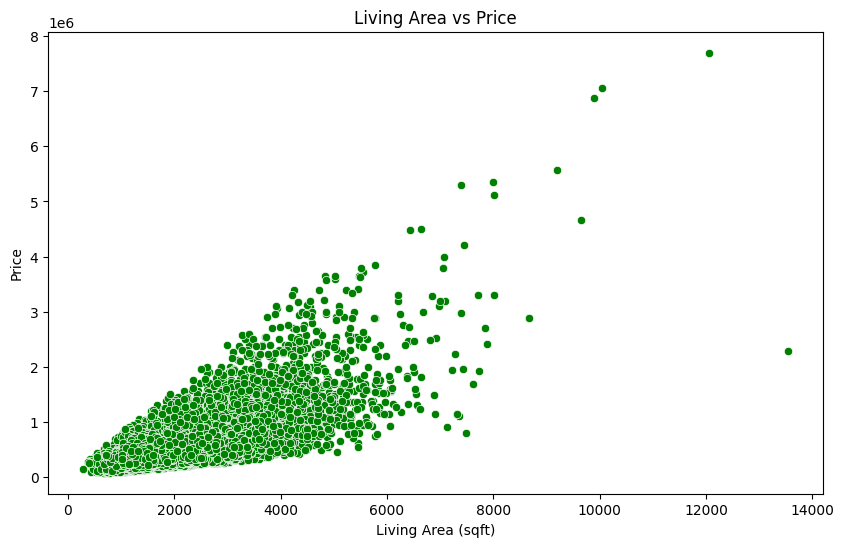

Naive Bayes Mean Squared Error: 87375997628.48808
Best Parameters (Linear Regression): {'fit_intercept': True}
Best Linear Regression Mean Squared Error: 45201157576.859276


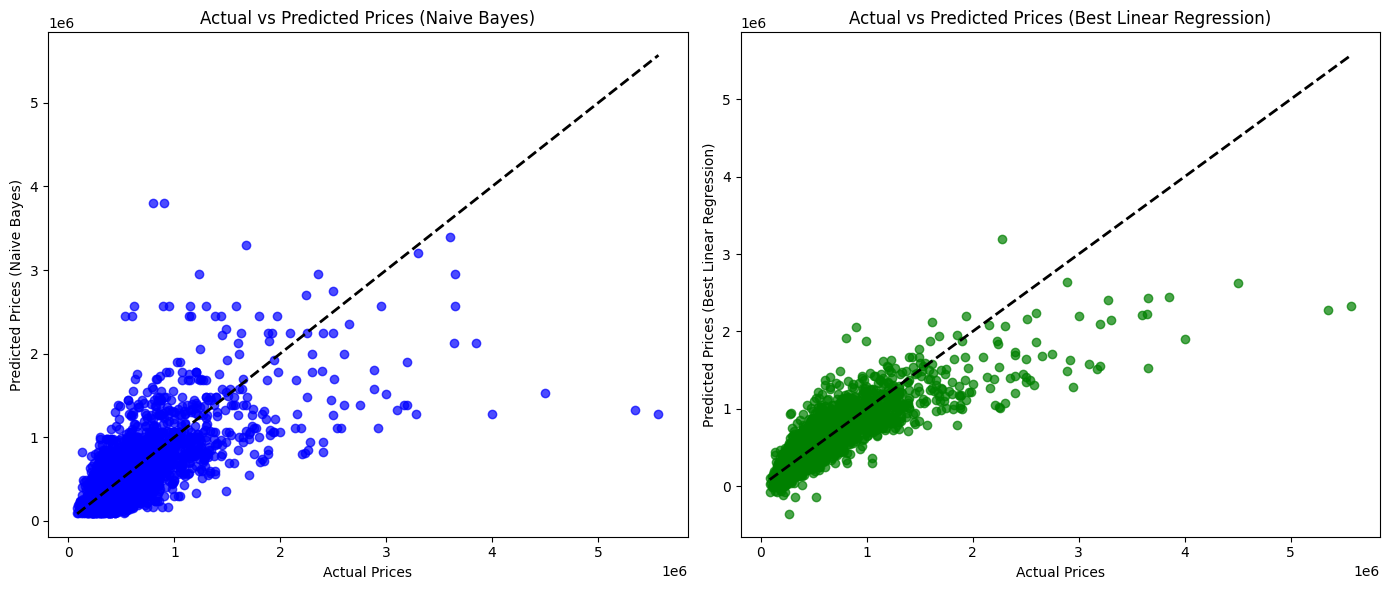

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 加载数据
data_path = "../data/美国金县房价预测.csv"
data = pd.read_csv(data_path)

# 数据预处理
# 检查缺失值
print(data.isnull().sum())
# 填充缺失值
data.fillna(data.mean(), inplace=True)

# 特征选择
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = data[features]
y = data['price']

# 数据探索性分析

# 绘制房价的分布图
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 绘制卧室数量与房价的关系图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=data, color='salmon')
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

# 绘制卫生间数量与房价的关系图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bathrooms', y='price', data=data, color='gold')
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

# 绘制居住面积与房价的关系图
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, color='green')
plt.title('Living Area vs Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 建立朴素贝叶斯模型
nb_model = GaussianNB()

# 模型训练
nb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_nb = nb_model.predict(X_test)

# 计算朴素贝叶斯模型的均方根误差
mse_nb = mean_squared_error(y_test, y_pred_nb)
print("Naive Bayes Mean Squared Error:", mse_nb)

# 建立线性回归模型
linear_model = LinearRegression()

# 定义线性回归的超参数空间
param_grid_linear = {
    'fit_intercept': [True, False],  # 是否拟合截距
}

# 定义网格搜索对象
grid_search_linear = GridSearchCV(LinearRegression(), param_grid_linear, cv=5)

# 进行网格搜索
grid_search_linear.fit(X_train, y_train)

# 输出最佳超参数
print("Best Parameters (Linear Regression):", grid_search_linear.best_params_)

# 最佳超参数下的线性回归模型
best_linear_model = grid_search_linear.best_estimator_

# 模型训练
best_linear_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_best_linear = best_linear_model.predict(X_test)

# 计算线性回归模型的均方根误差
mse_best_linear = mean_squared_error(y_test, y_pred_best_linear)
print("Best Linear Regression Mean Squared Error:", mse_best_linear)

# 结果可视化
plt.figure(figsize=(14, 6))

# 绘制朴素贝叶斯模型结果
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_nb, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Naive Bayes)")
plt.title("Actual vs Predicted Prices (Naive Bayes)")

# 绘制线性回归模型结果
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_best_linear, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Best Linear Regression)")
plt.title("Actual vs Predicted Prices (Best Linear Regression)")

plt.tight_layout()
plt.show()